Matplotlib is building the font cache; this may take a moment.


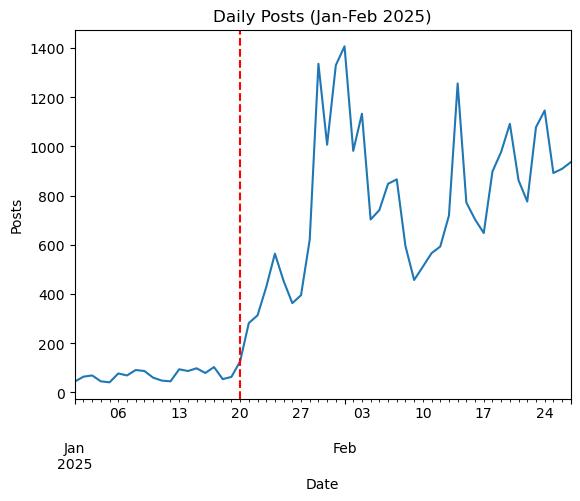

Top 10 Active Users:
 author
[deleted]               248
presfenol                92
Next-Coconut8461         58
AlarmingHat5154          44
Great_Explanation_64     43
FedUnionist              39
Mynameis__--__           37
Cold-Memory-2493         33
Simple_Panda6232         33
N0rma1_guy               33
Name: count, dtype: int64

Engagement Trends:
         avg_comments   avg_score
period                          
After      22.838468  159.868879
Before     28.585736   38.945372


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_json("2_months_data/filtered_posts.jsonl", lines=True)

# Convert timestamp to datetime
df["date"] = pd.to_datetime(df["created_utc"], unit="s")

# Daily post volume
daily_posts = df.set_index("date").resample("D").size()
daily_posts.plot(title="Daily Posts (Jan-Feb 2025)")
plt.xlabel("Date")
plt.ylabel("Posts")
plt.axvline(pd.Timestamp("2025-01-20"), color="red", linestyle="--", label="Event")
plt.show()

# Top 10 active users
top_users = df["author"].value_counts().head(10)
print("Top 10 Active Users:\n", top_users)

# Engagement metrics (pre/post event)
event_date = pd.Timestamp("2025-01-20")
df["period"] = df["date"].apply(lambda x: "Before" if x < event_date else "After")

engagement = df.groupby("period").agg(
    avg_comments=("num_comments", "mean"),
    avg_score=("score", "mean")
)
print("\nEngagement Trends:\n", engagement)

Objective: Track changes in posting frequency and engagement around Jan 20, 2025.

Key Metrics:
Daily post volume (before/after event).

Top active users (author).

Engagement trends (num_comments, score).

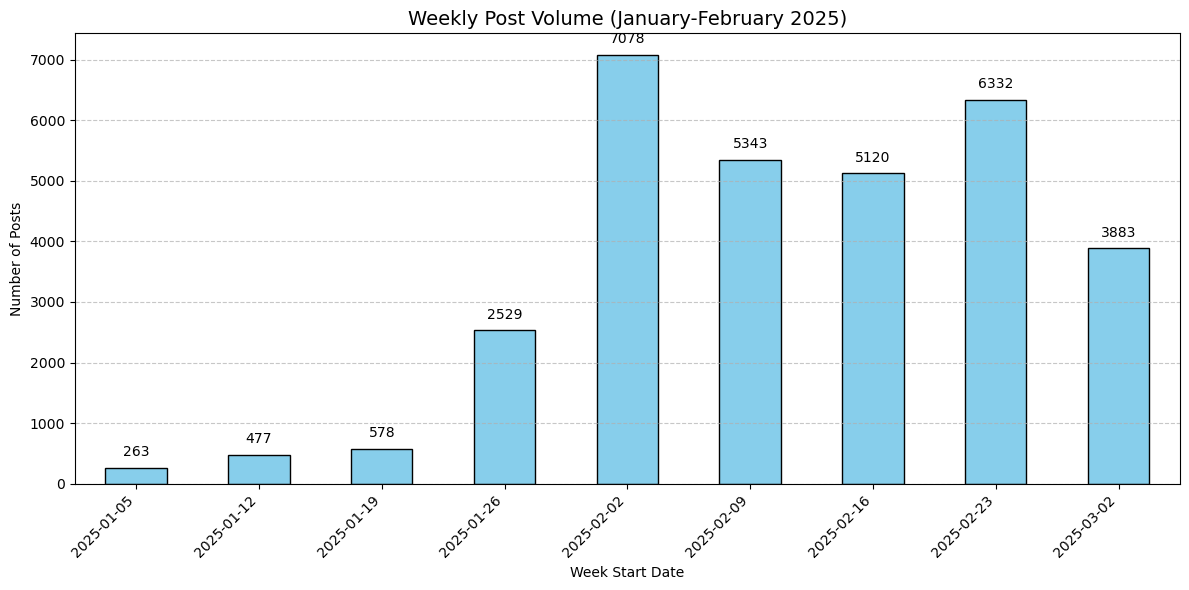

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load filtered data
df = pd.read_json("2_months_data/filtered_posts.jsonl", lines=True)

# Convert timestamp to datetime
df["date"] = pd.to_datetime(df["created_utc"], unit="s")

# Group posts by week
weekly_posts = df.resample('W', on='date').size()

# Plot
plt.figure(figsize=(12, 6))
ax = weekly_posts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize x-axis labels to show week start dates
ax.set_xticks(range(len(weekly_posts)))
ax.set_xticklabels(
    [date.strftime("%Y-%m-%d") for date in weekly_posts.index],
    rotation=45,
    ha='right'
)

# Add frequency labels on top of bars
for i, (date, count) in enumerate(weekly_posts.items()):
    ax.text(
        i, 
        count + (0.02 * weekly_posts.max()),  # Offset label slightly above bar
        f'{count}',
        ha='center',
        va='bottom'
    )

# Style
plt.title("Weekly Post Volume (January-February 2025)", fontsize=14)
plt.xlabel("Week Start Date")
plt.ylabel("Number of Posts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save or display
plt.savefig("weekly_post_volume.png", dpi=300, bbox_inches='tight')
plt.show()

Topic Evolution Analysis
Objective: Identify dominant topics (e.g., "Fed-Firing", "ICE") and track their prevalence. also visualize using bar chart and worldcloud.

Key Metrics:
Keyword frequency (e.g., "layoff", "policy").

Topic clusters (LDA).

Flair-based trends (link_flair_text).

<>:38: SyntaxWarning: invalid escape sequence '\['
<>:38: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_3295294/1219086334.py:38: SyntaxWarning: invalid escape sequence '\['
  df["text"] = df["text"].str.replace("\[removed\]|\[deleted\]", "", regex=True, case=False)


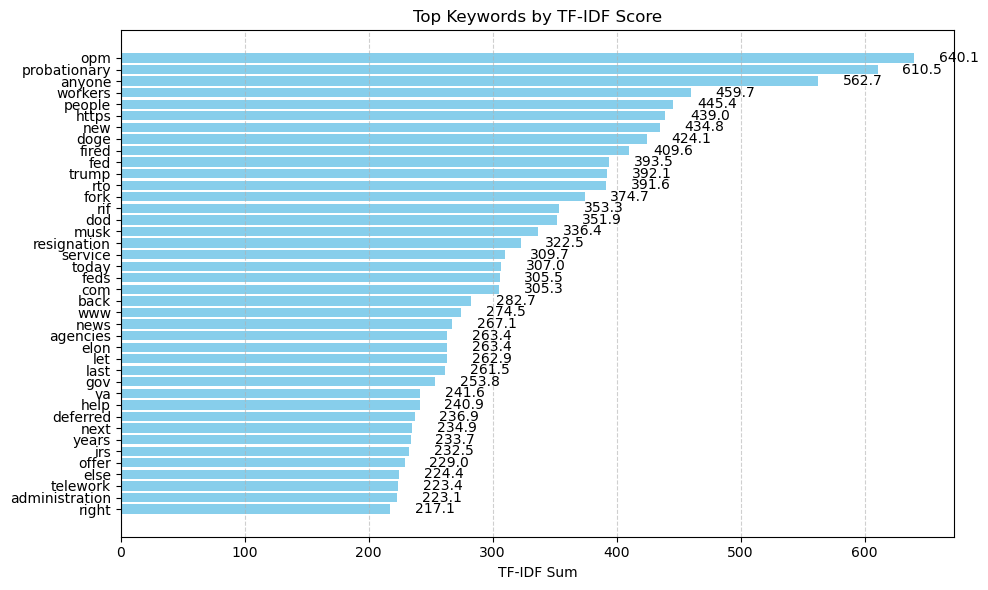

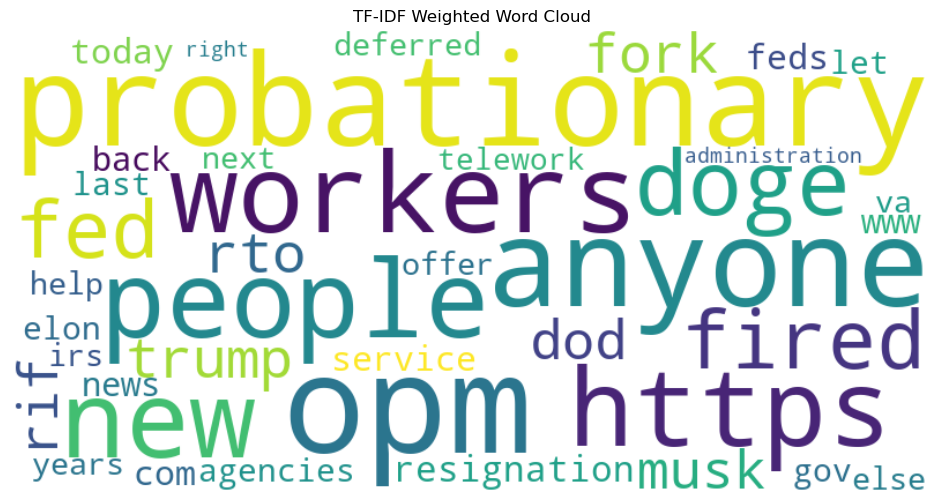

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

SINGLE_STOPWORDS = set(stopwords.words('english')).union({
    # General fillers
    'get', 'got', 'like', 'know', 'one', 'thing', 'things', 'really', 'would', 'could', 'also',
    'even', 'make', 'much', 'many', 'say', 'said', 'well', 'still', 'dont', 'didnt', 'cant', 'im',
    'us', 'use', 'using', 'way', 'need', 'want', 'think', 'go', 'going', 'take', 'give', 'see', 'may',  
    # Contextless personal pronouns
    'i', 'you', 'he', 'she', 'we', 'they', 'me', 'him', 'her', 'them', 'your', 'my', 'our', 'their',   
    # Domain-generic words
    'agency', 'federal', 'employee', 'employees', 'government', 'position', 'job', 'jobs', 'office',
    'manager', 'supervisor', 'human', 'resource', 'work', 'working', 'time', 'day', 'year', 'month',
    'week', 'leave', 'pay', 'email', 'contact', 'title', 'context', 'question', 'concern', 'thank',
    'please', 'subreddit', 'moderator', 'bot', 'automatically', 'performed', 'message', 'compose',
    # Reddit/meta-specific terms
    'removed', 'deleted', 'post', 'thread', 'comment', 'reply', 'upvote', 'downvote',
})


# Load filtered data
df = pd.read_json("2_months_data/filtered_posts.jsonl", lines=True)

# Convert timestamp to datetime
df["date"] = pd.to_datetime(df["created_utc"], unit="s")

# # Group posts by week
# weekly_posts = df.resample('W', on='date').size()

# Combine title and selftext
df["text"] = df["title"] + " " + df["selftext"]

# Clean the text column
df["text"] = df["text"].str.replace("\[removed\]|\[deleted\]", "", regex=True, case=False)

# TF-IDF for keyword extraction
tfidf = TfidfVectorizer(stop_words=list(SINGLE_STOPWORDS), max_features=1000)
tfidf_matrix = tfidf.fit_transform(df["text"])

# Top keywords
keywords = pd.Series(
    tfidf_matrix.sum(axis=0).A1,
    index=tfidf.get_feature_names_out()
).sort_values(ascending=False).head(40)
#print("Top Keywords:\n", keywords)


import matplotlib.pyplot as plt

# Convert keywords to DataFrame
keywords_df = keywords.reset_index()
keywords_df.columns = ["word", "tfidf_sum"]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(keywords_df["word"], keywords_df["tfidf_sum"], color="skyblue")
plt.xlabel("TF-IDF Sum")
plt.title("Top Keywords by TF-IDF Score")
plt.gca().invert_yaxis()  # Highest score at top
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Add labels
for i, v in enumerate(keywords_df["tfidf_sum"]):
    plt.text(v + 20, i, f"{v:.1f}", va="center")

plt.tight_layout()
plt.show()



from wordcloud import WordCloud

# Convert TF-IDF scores to a dictionary
word_weights = keywords.to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white")
wordcloud.generate_from_frequencies(word_weights)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Weighted Word Cloud")
plt.show()




Top 20 TF–IDF terms for 2025-01:
  opm: 248.75
  trump: 181.70
  rto: 175.47
  fork: 120.89
  telework: 118.02
  workers: 112.67
  remote: 111.97
  fed: 111.83
  resignation: 103.09
  freeze: 102.37
  probationary: 98.73
  hiring: 95.77
  road: 90.13
  feds: 86.20
  union: 83.72
  hr: 81.81
  gov: 81.65
  resign: 79.54
  administration: 79.34
  2025: 76.96
  return: 76.68
  buyout: 76.26
  else: 74.59
  doge: 74.17
  agencies: 73.62
  good: 72.08
  elon: 71.87
  executive: 69.74
  guidance: 69.34
  musk: 69.20

Top 20 TF–IDF terms for 2025-02:
  probationary: 514.63
  opm: 399.43
  fired: 362.49
  workers: 358.67
  doge: 349.05
  rif: 316.28
  dod: 300.88
  fed: 290.69
  musk: 270.60
  fork: 261.17
  resignation: 224.57
  feds: 222.92
  rto: 215.69
  trump: 209.80
  firings: 197.75
  irs: 197.36
  agencies: 194.39
  elon: 193.50
  next: 189.18
  va: 188.75
  usaid: 182.52
  gov: 178.83
  help: 177.71
  deferred: 173.62
  terminated: 172.30
  else: 161.14
  drp: 158.95
  right: 153.71


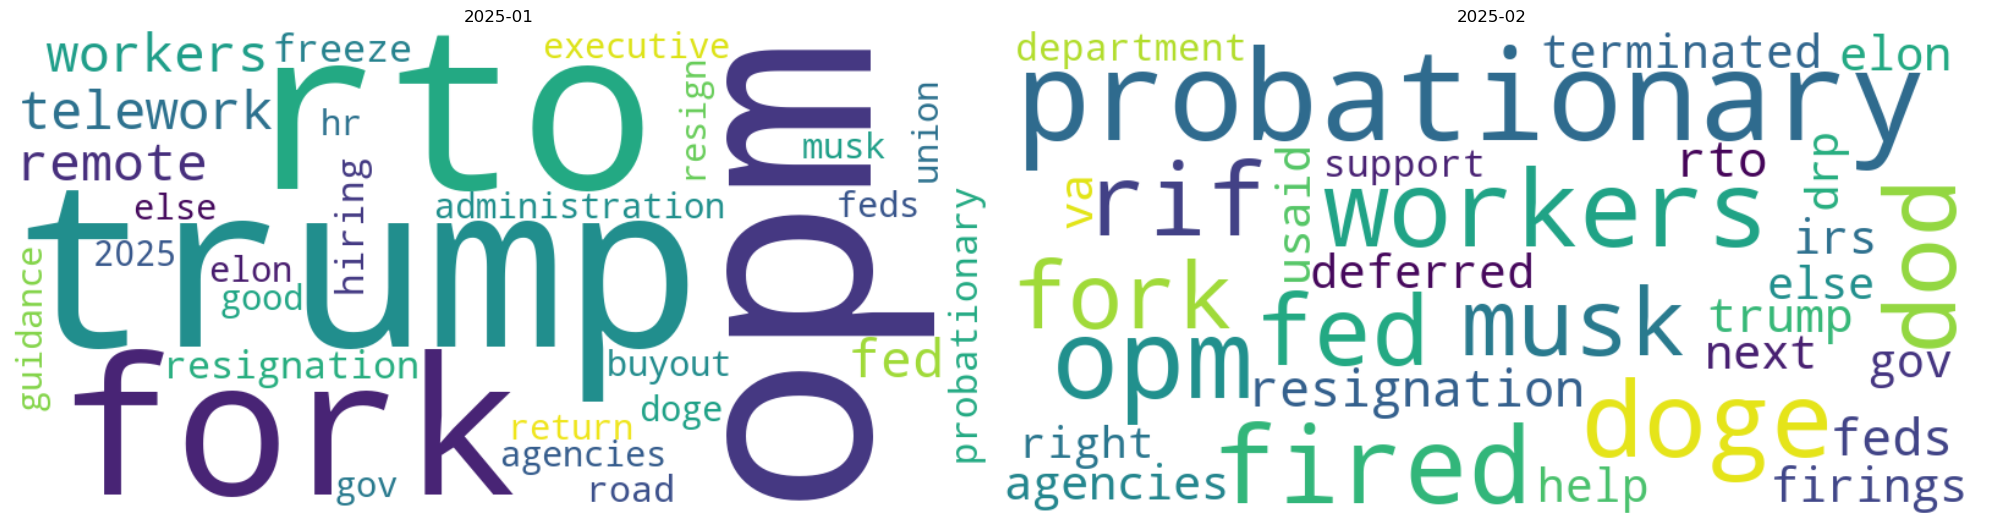

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from wordcloud import WordCloud


SINGLE_STOPWORDS = set(stopwords.words('english')).union({
    # General fillers
    'get', 'got', 'like', 'know', 'one', 'thing', 'things', 'really', 'would', 'could', 'also',
    'even', 'make', 'much', 'many', 'say', 'said', 'well', 'still', 'dont', 'didnt', 'cant', 'im',
    'us', 'use', 'using', 'way', 'need', 'want', 'think', 'go', 'going', 'take', 'give', 'see', 'may',  
    # Contextless personal pronouns
    'i', 'you', 'he', 'she', 'we', 'they', 'me', 'him', 'her', 'them', 'your', 'my', 'our', 'their',   
    # Domain-generic words
    'agency', 'federal', 'employee', 'employees', 'government', 'position', 'job', 'jobs', 'office',
    'manager', 'supervisor', 'human', 'resource', 'work', 'working', 'time', 'day', 'year', 'month',
    'week', 'leave', 'pay', 'email', 'contact', 'title', 'context', 'question', 'concern', 'thank',
    'please', 'subreddit', 'moderator', 'bot', 'automatically', 'performed', 'message', 'compose',
    # Reddit/meta-specific terms
    'removed', 'deleted', 'post', 'thread', 'comment', 'reply', 'upvote', 'downvote',

    # removing from wordcloud

    'new', 'anyone', 'people', 'back', 'years', 'today', 'last', 'let', 'service', 'offer', 'news', 'https', 'www', 'com'
})

# Load and preprocess
df = pd.read_json("2_months_data/filtered_posts.jsonl", lines=True)
df["date"] = pd.to_datetime(df["created_utc"], unit="s")
df["text"] = (df["title"] + " " + df["selftext"]) \
                .str.replace(r"\[removed\]|\[deleted\]", "", regex=True, case=False)

# Add a month column in YYYY-MM format
df["month"] = df["date"].dt.to_period("M").astype(str)
# Get the two months in sorted order
months = sorted(df["month"].unique())

# Prepare subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for ax, month in zip(axes, months):
    texts = df.loc[df["month"] == month, "text"].tolist()
    
    # Compute TF-IDF
    vect = TfidfVectorizer(stop_words=list(SINGLE_STOPWORDS), max_features=1000)
    X = vect.fit_transform(texts)
    
    # Sum scores per term
    sums = X.sum(axis=0).A1
    terms = vect.get_feature_names_out()
    term_scores = dict(zip(terms, sums))
    
    # Get top 20 terms
    top20 = sorted(term_scores.items(), key=lambda x: x[1], reverse=True)[:30]
    top_terms, top_scores = zip(*top20)
    
    # Print them
    print(f"\nTop 20 TF–IDF terms for {month}:")
    for term, score in top20:
        print(f"  {term}: {score:.2f}")
    
    # Build word‐cloud only from top 20
    wc = WordCloud(width=800, height=400, background_color="white")
    wc.generate_from_frequencies(dict(top20))
    
    # Plot
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"{month}")

plt.tight_layout()
plt.show()

## need to investigate whether high tf-idf of "removed" is coming from posts or it's a moderation artifact

In [8]:
removed_posts = df[df["selftext"].str.contains("removed", na=False) | 
                df["title"].str.contains("removed", na=False)]
print(f"Posts with '[removed]': {len(removed_posts)}")

Posts with '[removed]': 15677


## 15677 posts with no selftext, only the value removed, need to check if this affected other analysis. maybe not because this is the first time i am analyzing post texts.

# LDA Topic Modeling

In [ ]:
# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Print topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

# Flair analysis
flair_counts = df.groupby(["period", "link_flair_text"]).size().unstack()
flair_counts.plot(kind="bar", stacked=True, title="Flair Trends")
plt.show()